# 分词

In [1]:
import pandas as pd
import jieba
import numpy as np
import collections
from wordcloud import WordCloud
import matplotlib as mpl    
from matplotlib import pyplot as plt
mpl.rcParams['font.sans-serif'] = ['SimHei']  #指定默认字体
mpl.rcParams['axes.unicode_minus'] = False   #正常显示图像中的负号

import gensim
from gensim import corpora, models, similarities
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import string
from sklearn.cluster import KMeans
from collections import Counter
from sklearn.decomposition import LatentDirichletAllocation as LDA

In [2]:
# 读取数据
path = open(r'D:\my_data\comment_huozhe.csv')
book_data = pd.read_csv(path,usecols=['comment'],encoding='utf-8')

comment = []
for i in range(book_data.shape[0]):
     comment.append([book_data.loc[i,'comment']])   

print(comment)

[['好吧。我突然想起来还有这么一本书。在去年炎热夏季。从成都到南宁的火车上。36个小时。我突然想起来还有这么一本书在我的背包里。对面是吃瓜子喝啤酒恩爱的年轻男女。男子高瘦英俊。法学本科。女子温暖小巧。垂下眼有着美丽的睫毛。突然觉得无聊。于是聊到有什么杂志看。我说有，一本书，余华的活着。女子接过去。问，你看过吗？看过。才怪。但是诚实与否并不是义务。只是自己的书没有看过，下意识会有一点尴尬。好看吗？还成。于是女子拿着书看去了。男子无聊，靠在我边上聊天。火车上的时间漫长遥远，似乎永远到不了头。当日头黑下来。我知道。这一天结束了。女子悠悠叹了口气，什么也没有说。然后睡去了。书看到一半。于是男子接过来看，我开始觉得饥饿。去走廊找食物。洗脸。喝水。上厕所。完了就站在人来人往的过道吸烟。不知哪里来的风。觉得微凉。回到座位的时候，女子醒来，接着看。不知道又过了多久，我们已经昏昏沉沉的时候，女子突然哭了出来。然后到厕所洗手。男子亦觉得无话可说。出去了一会儿。这时候我边上的老人家，一直没有话的某人。拿着书看。夜班的火车不熄灯。于是这本书在他们之间交替转手。女人靠着男人睡了。快破晓的时候，老人家看完书递给我。然后叹息一声。到过道接水泡茶。我在他起身的时候，问他，怎么样。他微微笑，恩，很好。男子在太阳出来的时候接着看。我不知道他看着什么，只是微微笑着，再微微皱眉，然后面上没有表情。合上书，给我。这时候距离到站还有15个小时。于是我开始看。情节就不赘述了。看到我知道黄昏正在转瞬即逝的时候，已经是中午。彻夜未眠并未让我疲倦。只是脑中画面不停交叉翻转。这样的一本书，年轻女子看见生命悲苦。年轻男子看见生命的无常。体会过了熹微和光明。老人家只是微微笑，说很好。原本就是活着，不如西方人说的，人活着就是为了找寻上帝。即使没有上帝，也要制造一个上帝出来。东方人更见谦和和沉静。把话说完了，悲伤留在心底。你看见衰败。你看见颓唐。你看见离奇却又平凡的人生。你只是抱着家珍说你们要好好过。你看见兴盛。你看见圆滚滚的妓女。你看见不孝和温顺。你看见生活怎么样折磨一个人。你看见老爷子无声的长叹。在田地的那一头。眼看他起朱楼，眼看他宴宾客，眼看他楼塌了。还是要活下去。所以富贵跟那头叫福贵的牛说啊，福贵啊，你要好好干活啊。家珍和有庆都比你耕得多啊。生活，或者说活着，就是活着。并没有什么话好说，只是车窗外夕阳又快要落下。我也

In [3]:
# 分词
cut_words = jieba.lcut(str(comment).strip(),cut_all=False) # 精确模式
print(len(cut_words))

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\86131\AppData\Local\Temp\jieba.cache
Loading model cost 0.696 seconds.
Prefix dict has been built successfully.


94565


In [4]:
print(cut_words)

['[', '[', "'", '好', '吧', '。', '我', '突然', '想', '起来', '还有', '这么', '一', '本书', '。', '在', '去年', '炎热', '夏季', '。', '从', '成都', '到', '南宁', '的', '火车', '上', '。', '36', '个', '小时', '。', '我', '突然', '想', '起来', '还有', '这么', '一', '本书', '在', '我', '的', '背包', '里', '。', '对面', '是', '吃', '瓜子', '喝啤酒', '恩爱', '的', '年轻', '男女', '。', '男子', '高瘦', '英俊', '。', '法学', '本科', '。', '女子', '温暖', '小巧', '。', '垂下眼', '有着', '美丽', '的', '睫毛', '。', '突然', '觉得', '无聊', '。', '于是', '聊到', '有', '什么', '杂志', '看', '。', '我', '说', '有', '，', '一', '本书', '，', '余华', '的', '活着', '。', '女子', '接过', '去', '。', '问', '，', '你', '看过', '吗', '？', '看过', '。', '才', '怪', '。', '但是', '诚实', '与否', '并', '不是', '义务', '。', '只是', '自己', '的', '书', '没有', '看过', '，', '下意识', '会', '有', '一点', '尴尬', '。', '好看', '吗', '？', '还成', '。', '于是', '女子', '拿', '着', '书', '看', '去', '了', '。', '男子', '无聊', '，', '靠', '在', '我', '边上', '聊天', '。', '火车', '上', '的', '时间', '漫长', '遥远', '，', '似乎', '永远', '到', '不了', '头', '。', '当日', '头', '黑', '下来', '。', '我', '知道', '。', '这', '一天', '结束', '了', '。', '女子', '悠悠', '叹', '

In [5]:
# 停用词过滤和去除占位符
with open('D:\my_data\Data_for_course\data_wenben\data\stop_words.txt','r',encoding='utf-8-sig') as f:
    stop_words = set([line.strip() for line in f])
new_data=[]
for word in cut_words:
    if word not in stop_words and word not in [' ','u3000']:
        new_data.append(word)
new_data = [word for word in new_data if len(word)>1]
print(new_data)

['本书', '去年', '炎热', '夏季', '成都', '南宁', '火车', '36', '小时', '本书', '背包', '对面', '瓜子', '喝啤酒', '恩爱', '年轻', '男女', '男子', '高瘦', '英俊', '法学', '本科', '女子', '温暖', '小巧', '垂下眼', '美丽', '睫毛', '无聊', '聊到', '杂志', '本书', '余华', '活着', '女子', '接过', '看过', '看过', '诚实', '义务', '看过', '下意识', '一点', '尴尬', '好看', '还成', '女子', '男子', '无聊', '边上', '聊天', '火车', '时间', '漫长', '遥远', '永远', '当日', '结束', '女子', '悠悠', '口气', '睡去', '一半', '男子', '接过', '饥饿', '走廊', '食物', '洗脸', '喝水', '厕所', '人来人往', '吸烟', '不知', '微凉', '回到', '座位', '女子', '醒来', '多久', '昏昏沉沉', '女子', '厕所', '洗手', '男子', '无话可说', '一会儿', '这时候', '边上', '老人家', '某人', '夜班', '火车', '熄灯', '本书', '之间', '交替', '转手', '女人', '靠着', '男人', '破晓', '老人家', '完书', '递给', '叹息', '一声', '水泡', '起身', '微微', '男子', '太阳', '看着', '微微', '微微', '皱眉', '面上', '表情', '上书', '这时候', '距离', '15', '小时', '情节', '赘述', '黄昏', '转瞬即逝', '中午', '彻夜未眠', '并未', '疲倦', '脑中', '画面', '不停', '交叉', '翻转', '本书', '年轻', '女子', '生命', '悲苦', '年轻', '男子', '生命', '无常', '体会', '熹微', '光明', '老人家', '微微', '原本', '活着', '西方人', '活着', '找寻', '上帝', '上帝', '制造', '上帝', '东方人', '更见', '谦和', '沉静', 

In [6]:
print(len(new_data))

32966


In [7]:
# 筛选后统计
word_counts = collections.Counter(new_data)
# 获取前10最高频的词
word_counts_top10 = word_counts.most_common(10)
print(word_counts_top10)

[('活着', 1012), ('福贵', 773), ('生活', 405), ('凤霞', 219), ('家珍', 218), ('苦难', 213), ('一生', 202), ('生命', 196), ('经历', 182), ('富贵', 178)]


In [8]:
# 绘制词云
my_cloud = WordCloud(
    # background_color='white',  # 设置背景颜色  默认是black
    width=900, height=600,
    max_words=100,            # 词云显示的最大词语数量
    font_path='simhei.ttf',   # 设置字体  显示中文
    max_font_size=99,         # 设置字体最大值
    min_font_size=16,         # 设置子图最小值
    random_state=50           # 设置随机生成状态，即多少种配色方案
).generate_from_frequencies(word_counts)

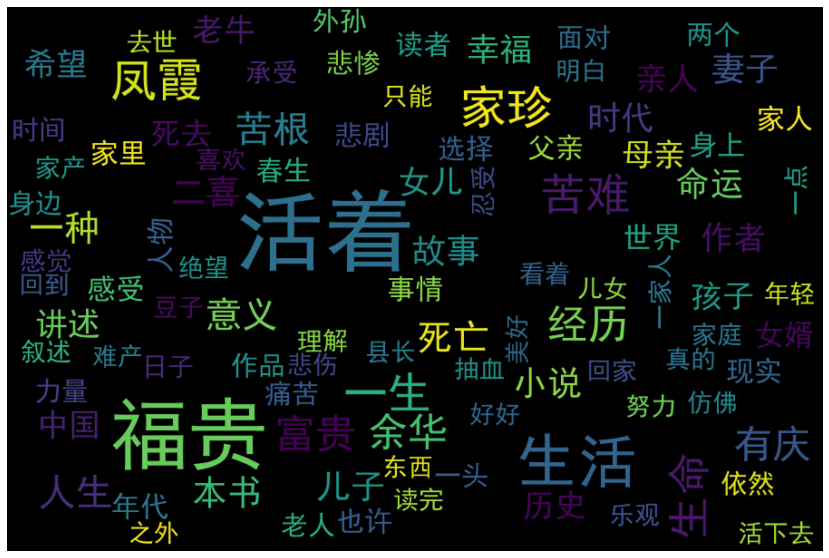

In [9]:
# 显示生成的词云图片
plt.figure(figsize=(15,10))
plt.imshow(my_cloud, interpolation='bilinear')
# 显示设置词云图中无坐标轴
plt.axis('off')
plt.show()

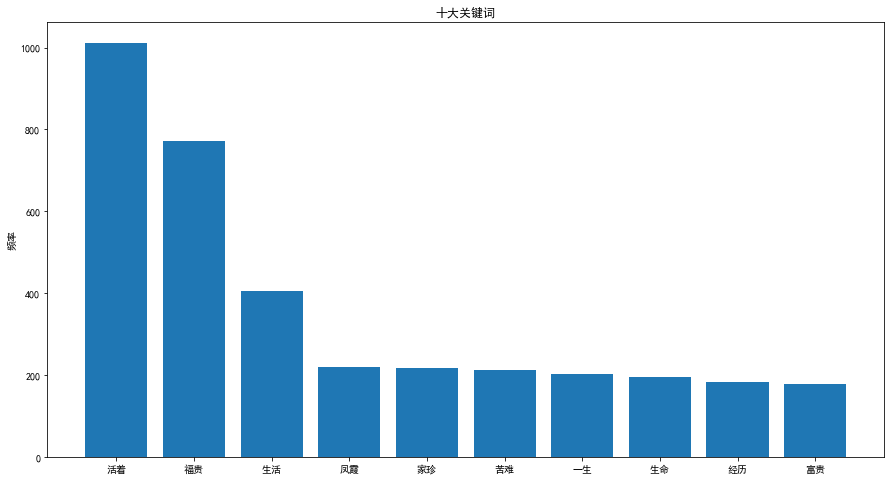

In [10]:
# 绘制关键词的分布直方图
x = [word_counts_top10[i][0] for i in range(10)]
y = [word_counts_top10[i][1] for i in range(10)]
plt.figure(figsize=(15,8))
plt.bar(x,y)
plt.title('十大关键词')
plt.ylabel('频率')
plt.show()

# 向量化

In [11]:
# 分词，形成语料库
def normalize_corpus(corpus):
    normalized_corpus = []
    for text in corpus:
        cut_word = jieba.lcut(text,cut_all=False)
        new_corpus = []
        for word in cut_word:
            if word not in stop_words and word not in [' ','u3000'] and len(word)>1:
                new_corpus.append(word)  
        text =" ".join(new_corpus)
        normalized_corpus.append(text)
    return normalized_corpus

# 调用函数，构建语料库
book_content = book_data['comment'].to_list()
norm_book_content = normalize_corpus(book_content)
print(' 语料库的内容 :', norm_book_content[0][:10])

 语料库的内容 : 本书 去年 炎热 夏


In [12]:
# 定义函数，将文本向量化
def build_feature_matrix(documents, feature_type='frequency',ngram_range=(1, 1), min_df=0.0, max_df=1.0): #min_df 和 max_df 用于过滤词条（太频繁或极少出现）
    feature_type = feature_type.lower().strip()
    if feature_type == 'binary':
        vectorizer = CountVectorizer(binary=True,max_df=max_df, ngram_range=ngram_range)
    elif feature_type == 'frequency':
        vectorizer = CountVectorizer(binary=False, min_df=min_df,
        max_df=max_df, ngram_range=ngram_range)
    elif feature_type == 'tfidf':
        vectorizer = TfidfVectorizer()
    else:
        raise Exception("Wrong feature type entered. Possible values: 'binary', 'frequency', 'tfidf'")
    feature_matrix = vectorizer.fit_transform(documents).astype(float)
    return vectorizer, feature_matrix

# 调用函数，将文本转换为向量
# 提取 tf-idf 特征
vectorizer, feature_matrix = build_feature_matrix(norm_book_content,feature_type='tfidf',min_df=0.2,max_df=0.9,ngram_range=(1,2))
# 查看特征数量
print(feature_matrix.shape)
# 获取特征名字
feature_names = vectorizer.get_feature_names()
# 打印某些特征
print("特征名称:", feature_names[:10])

(524, 8640)
特征名称: ['02', '10', '100', '11', '12', '13', '132', '15', '16', '18']


# 主题分析

In [13]:
# 上面用类 sklearn.feature_extraction.text 构建tf_idf模型从而实现文本向量化，这里也可以用sklearn，同时也可以用Gensim 的词袋模型函数 doc2bow 来进行主题分析
# 主题模型选用LDA
base_data = []
for i in range(book_data.shape[0]):
     base_data.append(book_data.loc[i,'comment'])

# 将 comment 中的数据进行遍历后分词并去掉停用词
base_items = [[i for i in jieba.lcut(str(item).strip(),cut_all=False) if len(i)>1 and i not in stop_words and i not in [' ','u3000']] for item in comment]

# 生成词典
dictionary = corpora.Dictionary(base_items)

In [14]:
# 通过 doc2bow 稀疏向量生成语料库
corpus = [dictionary.doc2bow(item) for item in base_items]
print(" 第一个书评的向量为 :{0}".format(corpus[0])) # 查看语料库
print(" 第五个书评向量的词袋：",dictionary.doc2bow(base_items[4]))

 第一个书评的向量为 :[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 3), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 2), (30, 1), (31, 1), (32, 1), (33, 1), (34, 1), (35, 1), (36, 1), (37, 1), (38, 1), (39, 1), (40, 1), (41, 1), (42, 1), (43, 1), (44, 1), (45, 1), (46, 7), (47, 2), (48, 1), (49, 1), (50, 1), (51, 2), (52, 1), (53, 1), (54, 1), (55, 1), (56, 2), (57, 1), (58, 1), (59, 1), (60, 3), (61, 1), (62, 1), (63, 1), (64, 1), (65, 1), (66, 4), (67, 1), (68, 1), (69, 1), (70, 1), (71, 1), (72, 1), (73, 1), (74, 1), (75, 1), (76, 1), (77, 2), (78, 1), (79, 1), (80, 2), (81, 1), (82, 1), (83, 1), (84, 1), (85, 1), (86, 5), (87, 1), (88, 1), (89, 1), (90, 1), (91, 1), (92, 1), (93, 1), (94, 1), (95, 1), (96, 1), (97, 1), (98, 5), (99, 1), (100, 1), (101, 1), (102, 3), (103, 1), (104, 1), (105, 1), (106, 1), (107, 2), (108, 2), (109, 1

In [17]:
# 通过 TF-IDF 模型算法，计算出 tf 值
tf = models.TfidfModel(corpus)
print(" 第 5 个书评的 TF-IDF ： \n",tf[corpus[4]])

 第 5 个书评的 TF-IDF ： 
 [(312, 0.1924056780155172), (708, 0.3568849806976042), (760, 0.23265034763538145), (761, 0.201100872492618), (762, 0.19657191502252278), (763, 0.44925355529716776), (764, 0.20606178410826062), (765, 0.2687287802482401), (766, 0.33996670299080395), (767, 0.1924056780155172), (768, 0.22462677764858388), (769, 0.20606178410826062), (770, 0.25375487779869893), (771, 0.201100872492618), (772, 0.18854834503572526)]


In [18]:
# 基于文本向量化的语料库，训练tfidf模型
tfidf=TfidfVectorizer()
weight=tfidf.fit_transform(norm_book_content).toarray()
#terms=tfidf.vocabulary_.keys()
#print(terms)

#输出结果
word=tfidf.get_feature_names()
print ('IFIDF词频矩阵:\n')
print (weight)
print(weight.shape)

IFIDF词频矩阵:

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
(524, 8640)


In [19]:
# 训练LDA模型
lda=LDA(n_components=6,random_state=0)
triTf = tfidf.fit_transform(norm_book_content)
docres=lda.fit_transform(triTf)

print("LDA结果：")
print("词汇有：",tfidf.get_feature_names())
print("书评属于某主题的概率：",docres)
print("词汇权重：",lda.components_)

LDA结果：
词汇有： ['02', '10', '100', '11', '12', '13', '132', '15', '16', '18', '19', '1960', '1992', '1993', '1994', '1995', '20', '200', '2003', '2004', '2005', '2007', '2012', '2013', '2016', '2017', '2018', '2020', '2022', '21', '22', '24', '25', '29', '30', '36', '360', '40', '50', '60', '70', '80', '90', '996', 'always', 'amid', 'and', 'answer', 'are', 'be', 'contribute', 'exists', 'goes', 'good', 'hard', 'herethat', 'identity', 'is', 'it', 'just', 'kid', 'life', 'like', 'maxpro', 'may', 'me', 'mood', 'morning', 'not', 'on', 'or', 'play', 'powerful', 'ptsd', 'question', 'recurringwhat', 'rent', 'sad', 'si', 'so', 'solveig', 'song', 'ta', 'that', 'the', 'these', 'this', 'to', 'verse', 'when', 'xxx', 'you', 'zhuxi', 'zongli', '一丁点', '一万', '一下子', '一下子把', '一世', '一丝', '一丝丝', '一个个', '一个劲儿', '一个十二岁', '一个打', '一个月', '一九四二', '一了百了', '一事', '一亩', '一人', '一代', '一代人', '一代代', '一件', '一份', '一伏', '一众', '一会', '一会儿', '一伸', '一似', '一位', '一体', '一個', '一個面', '一具', '一击', '一刀', '一分', '一分钟', '一分钱', '一切都在', '一切都是'

In [20]:
#显示某主题的单词
n=6
feature_names=tfidf.get_feature_names()
for i, topic in enumerate(lda.components_):
	top_features_ind = topic.argsort()[:-n-1:-1]
	top_features = [feature_names[i] for i in top_features_ind]
	print("第{0}个主题的主要词汇：{1}".format(i+1,top_features))

第1个主题的主要词汇：['历史', '一阵子', '读者', '惊喜', '活着', '真诚地']
第2个主题的主要词汇：['全是', '召唤', '福贵', '有时候', '黑夜', '想想']
第3个主题的主要词汇：['历史', '活着', '难过', '小说', '时间', '人物']
第4个主题的主要词汇：['意义', '疯婆子', '时代', '活着', '生活', '福贵']
第5个主题的主要词汇：['活着', '福贵', '生活', '富贵', '苦难', '凤霞']
第6个主题的主要词汇：['时期', '文学', '足够', '历史', '余华', '时代']


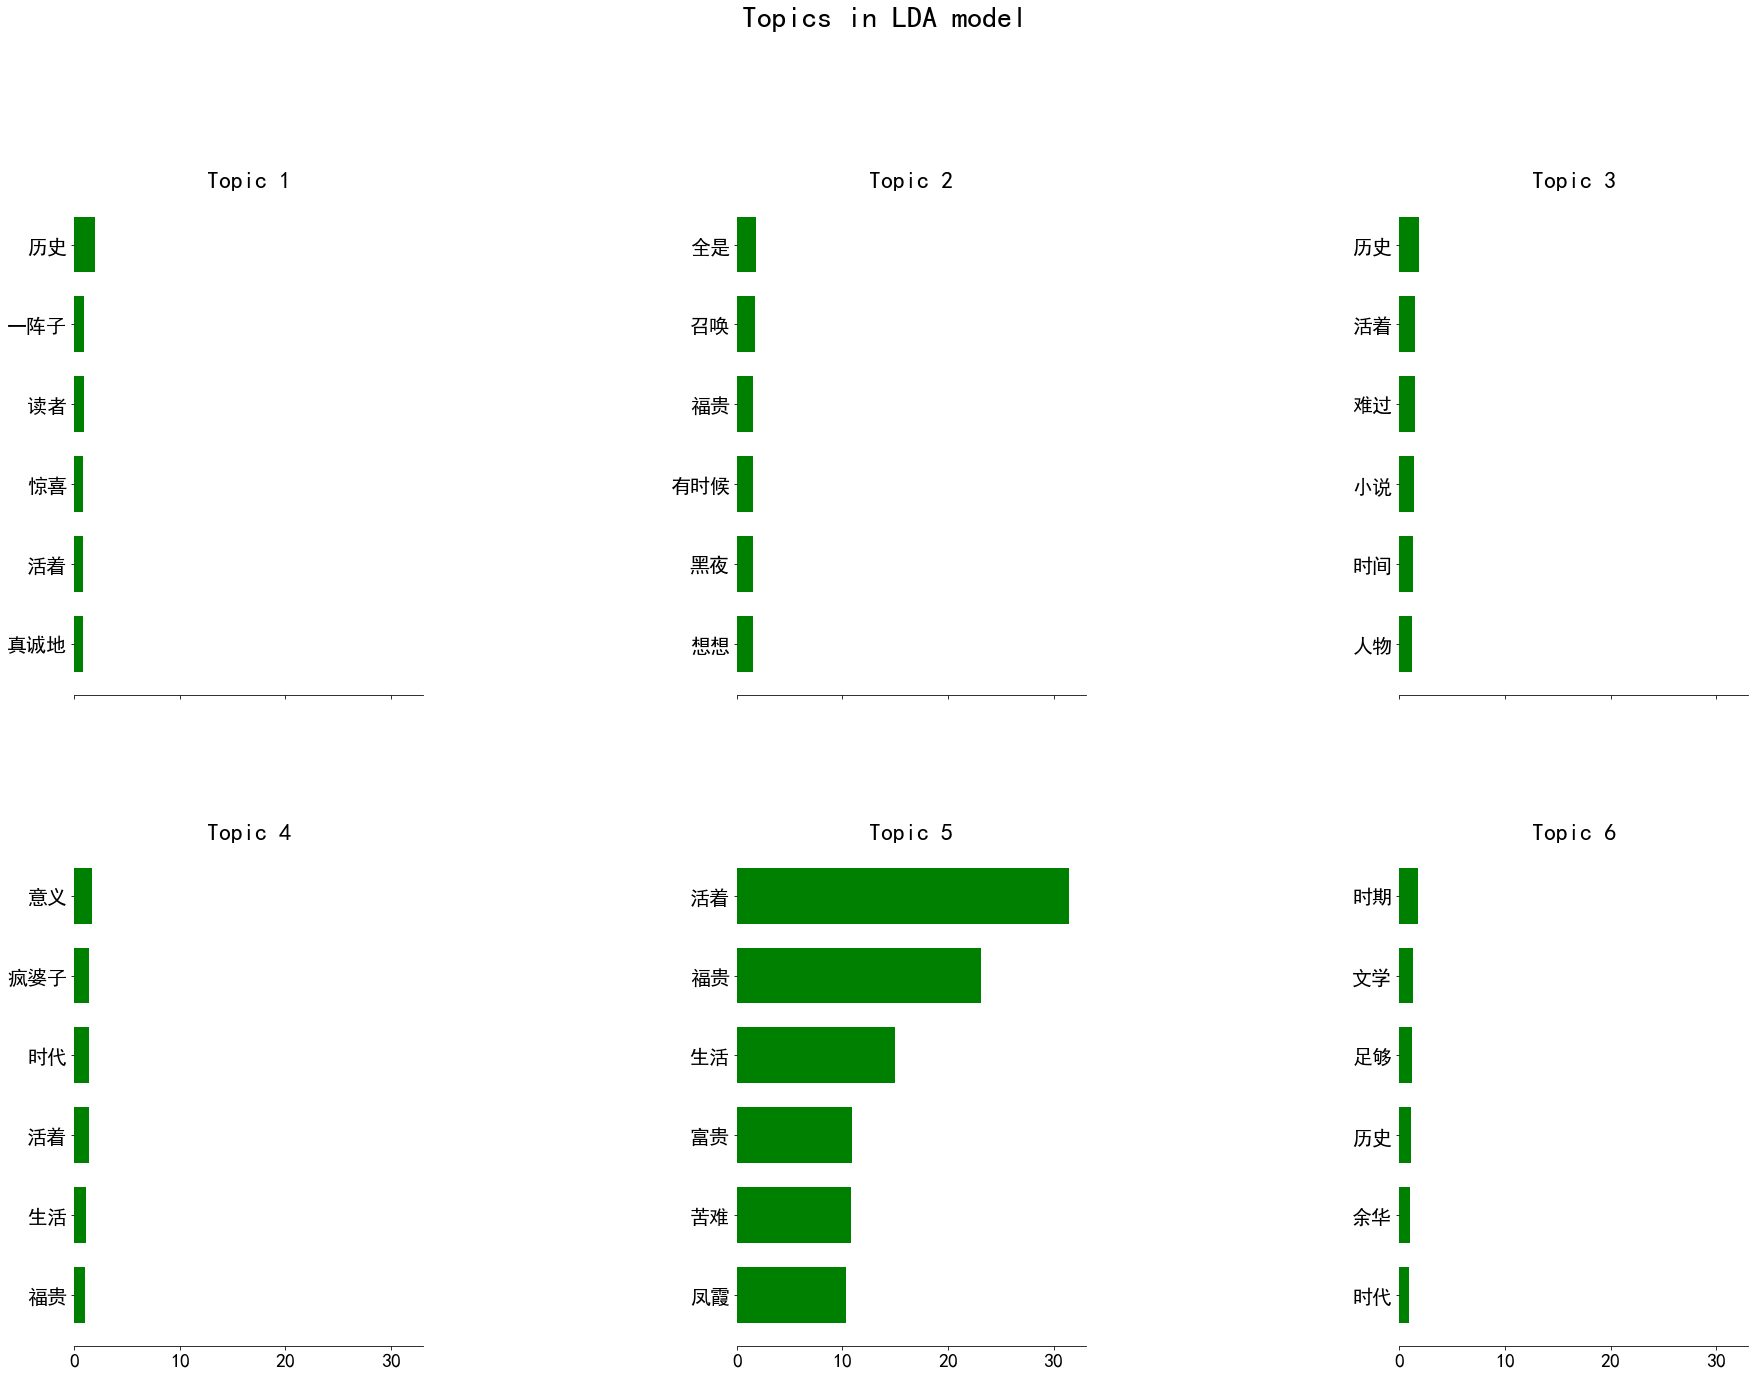

In [21]:
#做图显示结果
plt.rcParams['font.sans-serif'] = ['SimHei']
def plot_top_words(model, feature_names, n_top_words, title):
    fig, axes = plt.subplots(2, 3, figsize=(30, 20), sharex=True)
    axes = axes.flatten()
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[:-n_top_words - 1:-1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7,color='g')
        ax.set_title(f'Topic {topic_idx +1}',
                     fontdict={'fontsize': 24})
        ax.invert_yaxis()
        ax.tick_params(axis='both', which='major', labelsize=20)
        for i in 'top right left'.split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=30)

    plt.subplots_adjust(top=0.85, bottom=0.05, wspace=0.90, hspace=0.3)
    plt.show()
    
tf_feature_names=tfidf.get_feature_names()
n_top_words=6
plot_top_words(lda, tf_feature_names, n_top_words, 'Topics in LDA model')

# ML模型训练——聚类

In [23]:
# 为每条书评添加id标识
book_data['id'] = np.array([str(i) for i in range(len(book_data))])

In [24]:
# 利用特征矩阵，用 Sklearn 的 Kmeans 模型进行聚类
# 定义聚类函数
def k_means(feature_matrix, num_clusters=6):
    km = KMeans(n_clusters=num_clusters,max_iter=10000)
    km.fit(feature_matrix)
    clusters = km.labels_ # 每个样本的簇标签
    return km, clusters

# 调用函数，进行聚类
num_clusters = 3   # 聚类成3簇 
km_obj, clusters = k_means(feature_matrix=feature_matrix,num_clusters=num_clusters)
book_data['Cluster'] = clusters

# 获取每个 cluster 的数量
c = Counter(clusters)
print(c.items())

dict_items([(1, 300), (0, 88), (2, 136)])


In [25]:
# 获取聚类结果：
def get_cluster_data(clustering_obj, book_data,feature_names, num_clusters,topn_features=6):
    cluster_details = {}
    # 获取 cluster 的 center
    ordered_centroids= clustering_obj.cluster_centers_.argsort()[:, ::-1]
    # 获取每个 cluster 的关键特征
    # 获取每个 cluster 的评论id
    for cluster_num in range(num_clusters):
        cluster_details[cluster_num] = {}
        cluster_details[cluster_num]['cluster_num'] = cluster_num
        key_features = [feature_names[index] for index in ordered_centroids[cluster_num, :topn_features]]
        cluster_details[cluster_num]['key_features'] = key_features
        ids = book_data[book_data['Cluster'] == cluster_num]['id'].values.tolist()
        cluster_details[cluster_num]['ids'] = ids
    return cluster_details

In [26]:
# 定义打印聚类结果函数
def print_cluster_data(cluster_data):
    # 输出聚类结果
    for cluster_num, cluster_details in cluster_data.items():
        print('Cluster {} details:'.format(cluster_num))
        print('-' * 20)
        print('Key features:', cluster_details['key_features'])
        print('id in this cluster:')
        print(', '.join(cluster_details['ids']))
        print('=' * 40)

In [27]:
# 获取聚类结果
cluster_data =get_cluster_data(clustering_obj=km_obj,book_data=book_data,feature_names=feature_names,num_clusters=num_clusters,topn_features=6)
# 输出聚类结果
print_cluster_data(cluster_data)

Cluster 0 details:
--------------------
Key features: ['活着', '意义', '福贵', '生活', '苦难', '生命']
id in this cluster:
1, 3, 10, 12, 24, 32, 36, 52, 55, 62, 63, 70, 79, 83, 84, 91, 102, 123, 124, 125, 130, 136, 152, 153, 154, 164, 169, 178, 184, 185, 195, 198, 199, 205, 221, 233, 237, 241, 245, 250, 251, 261, 262, 279, 285, 288, 293, 296, 316, 323, 330, 333, 338, 340, 349, 360, 363, 365, 372, 378, 381, 393, 395, 400, 404, 406, 416, 418, 436, 438, 442, 451, 452, 456, 460, 461, 463, 464, 478, 486, 487, 503, 510, 515, 516, 517, 521, 523
Cluster 1 details:
--------------------
Key features: ['活着', '福贵', '历史', '余华', '时代', '生活']
id in this cluster:
0, 4, 5, 6, 7, 9, 13, 14, 15, 16, 18, 19, 20, 22, 23, 25, 26, 27, 29, 30, 34, 35, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 50, 56, 57, 58, 59, 60, 61, 64, 65, 66, 69, 71, 72, 73, 74, 75, 78, 81, 82, 85, 87, 92, 93, 94, 96, 97, 98, 99, 100, 101, 104, 105, 106, 107, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 128, 129, 131, 